Misconception 1: OLS same as linreg

In [1]:
# create toy example, estimate

In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import statsmodels.formula.api as smf

In [97]:
my_seed = 20210228

In [98]:
number_of_obs = 50
np.random.seed(my_seed)
X = np.random.uniform(0, 100, number_of_obs)
residuals = np.random.normal(0, 30, number_of_obs)
y = X + residuals
X = X.reshape(-1,1)

In [99]:
lr = LinearRegression()
y_pred_lr = lr.fit(X,y).predict(X)

In [100]:
# this does not seem to work
sgd = SGDRegressor(loss = 'epsilon_insensitive', epsilon = 0, penalty = 'l2')
y_pred_sgd = sgd.fit(X,y).predict(X)

In [110]:
df = np.concatenate([X[:,0],y])

In [111]:
df

array([  3.60726567,  85.04779852,  63.87322794,  83.29694247,
        67.02070454,  82.54758339,  73.66556881,  33.30301375,
        31.91863893,  87.39330431,  65.91946754,  87.75648812,
        85.10851609,   7.39919981,  14.19280043,  15.26379318,
        30.64267771,  74.91215632,  14.27291292,  89.69442842,
        91.76060374,  48.85936305,  27.4625871 ,  90.46736414,
        64.27032434,   3.99792005,  36.29854853,  43.20726348,
        23.80574918,  11.2524098 ,  53.64460507,   2.61934476,
        48.11804234,  54.19778742,  38.14443997,  55.38012444,
        71.1536777 ,  33.78835376,  40.75525268,  63.25727838,
        57.76587359,  87.15985049,  24.02020491,  93.32603609,
        64.56447806,  90.74587491,  27.58444447,   7.57070042,
        74.95236068,  26.45050482, -22.87495631, 109.53772275,
        37.67549065,  82.5637603 ,  98.96035676, 101.9939112 ,
        49.96888224,  31.33511164,   0.84346708,  73.60219551,
        79.25002839, 102.74620705,  69.41331609,  50.00

In [ ]:
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)

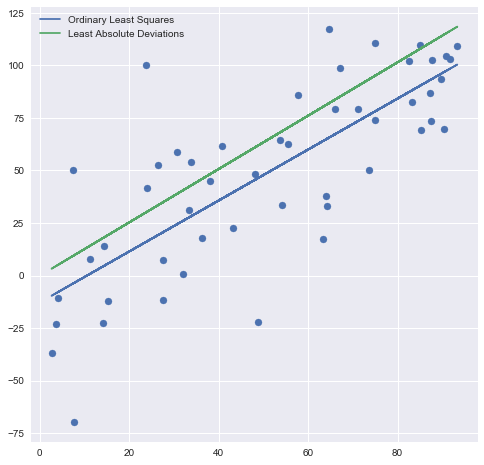

In [101]:
plt.figure(figsize  = (8,8))
plt.scatter(X[:,0], y)
plt.plot(X, y_pred_lr, label = 'Ordinary Least Squares')
plt.plot(X, y_pred_sgd, label = 'Least Absolute Deviations')

# plt.plot(X, Lasso().fit(X,y).predict(X), label = 'Lasso')
# plt.plot(X, Ridge().fit(X,y).predict(X), label = 'Ridge')
plt.legend()
plt.show()

to get the least absolute deviation, I used: https://stats.stackexchange.com/questions/376643/is-there-any-library-for-least-absolute-deviation-lad-regression-with-regulari